In [1]:
import sys
import randomwalk as rw
import scrape_json as scrape
import similarity as sm
import makeGraph as mg
import randomwalkfreq as rwf

NUM_ITERATIONS = 20 #NUMBER OF ITERATIONS OF RANDOM WALK
DEPTH = 10 #NUMBER OF STEPS TO TAKE IN RANDOM WALK

In [14]:
depth = 2
root_page = "https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors"
if depth == 1: 
    print(scrape.desc_1(root_page))
elif depth == 2: data_title = scrape.desc_2(root_page)

reading page: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors
reading page: https://en.wikipedia.org/wiki/Zero_vector
reading page: https://en.wikipedia.org/wiki/Field_(mathematics)


KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
def plot_similarity(G):
    weights = []
    for node1, node2 in G.edges():
        weights.append(G[node1][node2]['similarity'])
    # Display histogram of cosine similarity values
    n, bins, patches = plt.hist(weights, 10, facecolor='blue', alpha=0.5)
    plt.show()   

In [3]:
doc_title = "../data/Eigenvalues_and_eigenvectors_2.json"
G = mg.make_prototype_graph(doc_title).to_directed()

titles ['Eigenvalues and eigenvectors', 'Zero element', 'Field (mathematics)', 'Vector space', 'Vector space', 'Linear map', 'Linear algebra', 'Scalar (mathematics)', 'Matrix multiplication', 'Row and column vectors', 'Square matrix', 'Algebraic structure', '0', 'Mathematics', 'Axiom', 'Field (mathematics)', 'Rational number', 'Complex number', 'Real number', 'Scalar (mathematics)', 'Scalar multiplication', 'Euclidean vector', 'Three-dimensional space', 'Geometry', 'Force', 'Force', 'Physics', 'Euclidean vector', 'Hilbert space', 'Banach space', 'Metric (mathematics)', 'Inner product space', 'Norm (mathematics)', 'Continuous function', 'Topology', 'Function (mathematics)', 'Function space', 'Mathematical analysis', 'Dimension (vector space)', 'Linear algebra', 'Plane (geometry)', 'Line (geometry)', 'Euclidean space', 'Giuseppe Peano', 'Linear equation', 'Matrix (mathematics)', 'Analytic geometry', 'Abstract algebra', 'Manifold', 'Tensor', 'Coordinate-free', 'Partial differential equati

In [4]:
import json
with open(doc_title, "r") as f: 
    data = json.load(f)
page_title =data["pages"][0]["title"]

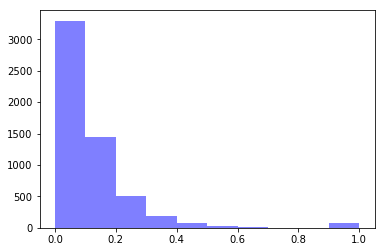

Enter a threshold to try: 0.05
[{'Eigenvalues and eigenvectors': 20}, {'Linear equation': 3, 'Functional analysis': 3, 'Identity matrix': 2}, {'Scalar multiplication': 3, '0': 3, 'Line (geometry)': 2}, {'Functional analysis': 3, 'Algebraic structure': 2, 'Eigenvalues and eigenvectors': 2}, {'Topology': 4, '0': 2, 'Rational number': 2}, {'0': 3, 'Algebraic structure': 2, 'Eigenvalues and eigenvectors': 2}, {'Topology': 3, '0': 2, 'Map (mathematics)': 2}, {'Science': 4, 'Rational number': 2, 'Quaternion': 2}, {'Eigenvalues and eigenvectors': 4, 'Topology': 3, 'Rational number': 2}, {'Line (geometry)': 2, 'Module homomorphism': 2, 'Linear equation': 2}]
Would you like to try another threshold? [Y/N]


In [5]:
mod_threshold = True
G = G.to_directed()
while mod_threshold:
    plot_similarity(G)
    threshold = float(input("Enter a threshold to try: "))
    path = rwf.DiGraphRandomWalk(G=G,niters=NUM_ITERATIONS, 
            depth=DEPTH, threshold=threshold, start_tag=page_title)
    print(path)
    answer = input("Would you like to try another threshold? [Y/N]")
    if(answer != "Y"): mod_threshold = False

In [15]:
info = {}
info["topics"] = []
title = ""
freq = 0
url = ""
desc = ""
with open(doc_title, "r") as f:
    data = json.load(f)
    
for i in path:
    for k in i.keys():
        for d in data["pages"]:
            if d["title"] == k: 
                url = d["url"]
                desc = d["desc_text"]
        freq = i.get(k)
    info_dict = {"title": k, "url": url, "desc": desc, "freq": freq}
    info["topics"].append(info_dict)

In [16]:
print(info)

{'topics': [{'title': 'Eigenvalues and eigenvectors', 'url': 'https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors', 'desc': "b'In linear algebra, an eigenvector or characteristic vector of a linear transformation is a non-zero vector that only changes by a scalar factor when that linear transformation is applied to it. More formally, if T is a linear transformation from a vector space V over a field F into itself and v is a vector in V that is not the zero vector, then v is an eigenvector of T if T(v) is a scalar multiple of v. This condition can be written as the equation'b'where \\xce\\xbb is a scalar in the field F, known as the eigenvalue, characteristic value, or characteristic root associated with the eigenvector v.'b'If the vector space V is finite-dimensional, then the linear transformation T can be represented as a square matrix A, and the vector v by a column vector, rendering the above mapping as a matrix multiplication on the left hand side and a scaling of the colum